In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier
import random

random_seed = 42

In [225]:
# file_name = 'XData.xlsx'
 
# # saving the excel
# datas.to_excel(file_name)

In [226]:
import warnings

# Suppress the specific UserWarning from sklearn
warnings.filterwarnings('ignore', category=UserWarning)

# Task 2 

Clara Louise Brodt

_____________
## DATA COLLECTION

____________

In [227]:
df = pd.read_csv('/Users/claralouisebrodt/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DTU/2. semester/Project in Statistical Evaluation for Artificial Intelligens/Individual assignment/HR_data.csv')

In [228]:
X = pd.DataFrame(df, columns=['HR_Mean', 'HR_Median','HR_std','HR_Min','HR_Max','HR_AUC','Round','Phase','Puzzler','Cohort'])
y = pd.DataFrame(df, columns=['Frustrated'])
groups = df['Individual']


label = LabelEncoder()
scaler = StandardScaler()

X[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']] = scaler.fit_transform(X[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']])

X['Round'] = label.fit_transform(X['Round'])
X['Phase'] = label.fit_transform(X['Phase'])
X['Cohort'] = label.fit_transform(X['Cohort'])
# X['HR_Mean'] = round(X['HR_Mean'],2)
# X['HR_Median'] = round(X['HR_Median'],2)
# X['HR_std'] = round(X['HR_std'],2)
# X['HR_AUC'] = round(X['HR_AUC'],2)


X = X.to_numpy()
y = y.to_numpy()

binary = True

if binary == True:
    y = df['Frustrated'].apply(lambda x: 0 if 0 <= x <= 3 else 1).to_numpy()


gkf = GroupKFold(n_splits=7)




_____________
## AI MODELS

_____________

## Dummy classifier

In [229]:
baseline_model = DummyClassifier(strategy='most_frequent')

print("\nBaseline Model Performance (Most Frequent Class):")


accuracy_dummy = []
precision_dummy = []
recall_dummy = []
f1_dummy = []
roc_auc_dummy = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    baseline_model.fit(X_train, y_train)
    
    y_pred = baseline_model.predict(X_test)
    y_prob = baseline_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    accuracy_dummy.append(accuracy)
    precision_dummy.append(precision)
    recall_dummy.append(recall)
    f1_dummy.append(f1)
    roc_auc_dummy.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

# Calculating and printing the average scores
print("-------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy : {np.mean(accuracy_dummy) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_dummy):.4f}    |')
print(f'| Average Recall : {np.mean(recall_dummy):.4f}    |')
print(f'| Average F1-Score : {np.mean(f1_dummy):.4f}    |')
print(f'| Average ROC-AUC : {np.mean(roc_auc_dummy):.4f}    |')



Baseline Model Performance (Most Frequent Class):
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 58.33%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5000 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 75.00%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5000 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 66.67%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5000 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 79.17%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5000 |
-----------------------------------------------------

## Model 1 : Logistic Regression model

In [245]:
model = LogisticRegression()
print("MODEL : Logistic Regression")


accuracy_lr = []
precision_lr = []
recall_lr = []
f1_lr = []
roc_auc_lr = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    accuracy_lr.append(accuracy)
    precision_lr.append(precision)
    recall_lr.append(recall)
    f1_lr.append(f1)
    roc_auc_lr.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

# Calculating and printing the average scores
print("---------------------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy : {np.mean(accuracy_lr) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_lr):.4f}    |')
print(f'| Average Recall : {np.mean(recall_lr):.4f}    |')
print(f'| Average F1-Score : {np.mean(f1_lr):.4f}    |')
print(f'| Average ROC-AUC : {np.mean(roc_auc_lr):.4f}    |')


MODEL : Logistic Regression
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 58.33%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.6143 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 75.00%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.4722 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 62.50%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.5234 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 79.17%  | Precision : 0.0000 | Recall : 0.0000 | F1-Score : 0.0000 | ROC-AUC : 0.7474 |
----------------------------------------------------------------------------

## Decision Tree

In [252]:
model = DecisionTreeRegressor()
print("MODEL : Decision Tree Regressor")


accuracy_dt = []
precision_dt = []
recall_dt = []
f1_dt = []
roc_auc_dt = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    accuracy_dt.append(accuracy)
    precision_dt.append(precision)
    recall_dt.append(recall)
    f1_dt.append(f1)
    roc_auc_dt.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

# Calculating and printing the average scores
print("-------------------------------------------------------------------------------------------------")
print(f'| Average Accuracy : {np.mean(accuracy_dt) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_dt):.4f}    |')
print(f'| Average Recall : {np.mean(recall_dt):.4f}    |')
print(f'| Average F1-Score : {np.mean(f1_dt):.4f}    |')
print(f'| Average ROC-AUC : {np.mean(roc_auc_dt):.4f}    |')
    

MODEL : Decision Tree Regressor
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 66.67%  | Precision : 0.6250 | Recall : 0.5000 | F1-Score : 0.5556 | ROC-AUC : 0.6429 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 54.17%  | Precision : 0.1429 | Recall : 0.1667 | F1-Score : 0.1538 | ROC-AUC : 0.4167 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 58.33%  | Precision : 0.3750 | Recall : 0.3750 | F1-Score : 0.3750 | ROC-AUC : 0.5312 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 79.17%  | Precision : 0.5000 | Recall : 0.6000 | F1-Score : 0.5455 | ROC-AUC : 0.7211 |
------------------------------------------------------------------------

## Random Forest

In [232]:
model = RandomForestClassifier()
print("MODEL : Random Forest Classifier")

accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
roc_auc_rf = []

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    accuracy_rf.append(accuracy)
    precision_rf.append(precision)
    recall_rf.append(recall)
    f1_rf.append(f1)
    roc_auc_rf.append(roc_auc)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("---------------------------------------------------------------------------------------------------------------")
    print(f'| Fold : {i+1} | Accuracy : {accuracy * 100:.2f}%  | Precision : {precision:.4f} | Recall : {recall:.4f} | F1-Score : {f1:.4f} | ROC-AUC : {roc_auc:.4f} |')

# Calculating and printing the average scores
print("----------------------------------------------------------")
print(f'| Average Accuracy : {np.mean(accuracy_rf) * 100:.2f}% |')
print(f'| Average Precision : {np.mean(precision_rf):.4f}    |')
print(f'| Average Recall : {np.mean(recall_rf):.4f}    |')
print(f'| Average F1-Score : {np.mean(f1_rf):.4f}    |')
print(f'| Average ROC-AUC : {np.mean(roc_auc_rf):.4f}    |')
    

MODEL : Random Forest Classifier
---------------------------------------------------------------------------------------------------------------
| Fold : 1 | Accuracy : 66.67%  | Precision : 1.0000 | Recall : 0.2000 | F1-Score : 0.3333 | ROC-AUC : 0.7071 |
---------------------------------------------------------------------------------------------------------------
| Fold : 2 | Accuracy : 70.83%  | Precision : 0.3333 | Recall : 0.1667 | F1-Score : 0.2222 | ROC-AUC : 0.4907 |
---------------------------------------------------------------------------------------------------------------
| Fold : 3 | Accuracy : 75.00%  | Precision : 0.6667 | Recall : 0.5000 | F1-Score : 0.5714 | ROC-AUC : 0.6172 |
---------------------------------------------------------------------------------------------------------------
| Fold : 4 | Accuracy : 75.00%  | Precision : 0.4000 | Recall : 0.4000 | F1-Score : 0.4000 | ROC-AUC : 0.6842 |
-----------------------------------------------------------------------

_____________
## STATISTICS

_____________

In [253]:
import pandas as pd
import scipy.stats as stats


anova_accuracy = stats.f_oneway(accuracy_lr,accuracy_dt,accuracy_rf)
print(anova_accuracy)

anova_recall = stats.f_oneway(recall_lr,recall_dt,recall_rf)
print(anova_recall)

anova_precision = stats.f_oneway(precision_lr,precision_dt,precision_rf)
print(anova_precision)

anova_roc_auc = stats.f_oneway(roc_auc_lr,roc_auc_dt,roc_auc_rf)
print(anova_roc_auc)


F_onewayResult(statistic=1.1422594142259421, pvalue=0.34116946467318515)
F_onewayResult(statistic=9.543932667406581, pvalue=0.0014940530194970294)
F_onewayResult(statistic=3.9103446415835847, pvalue=0.038881415006136365)
F_onewayResult(statistic=0.6519925994295372, pvalue=0.532880419748153)


________________________
## PLOTS AND OTHERS
_____________

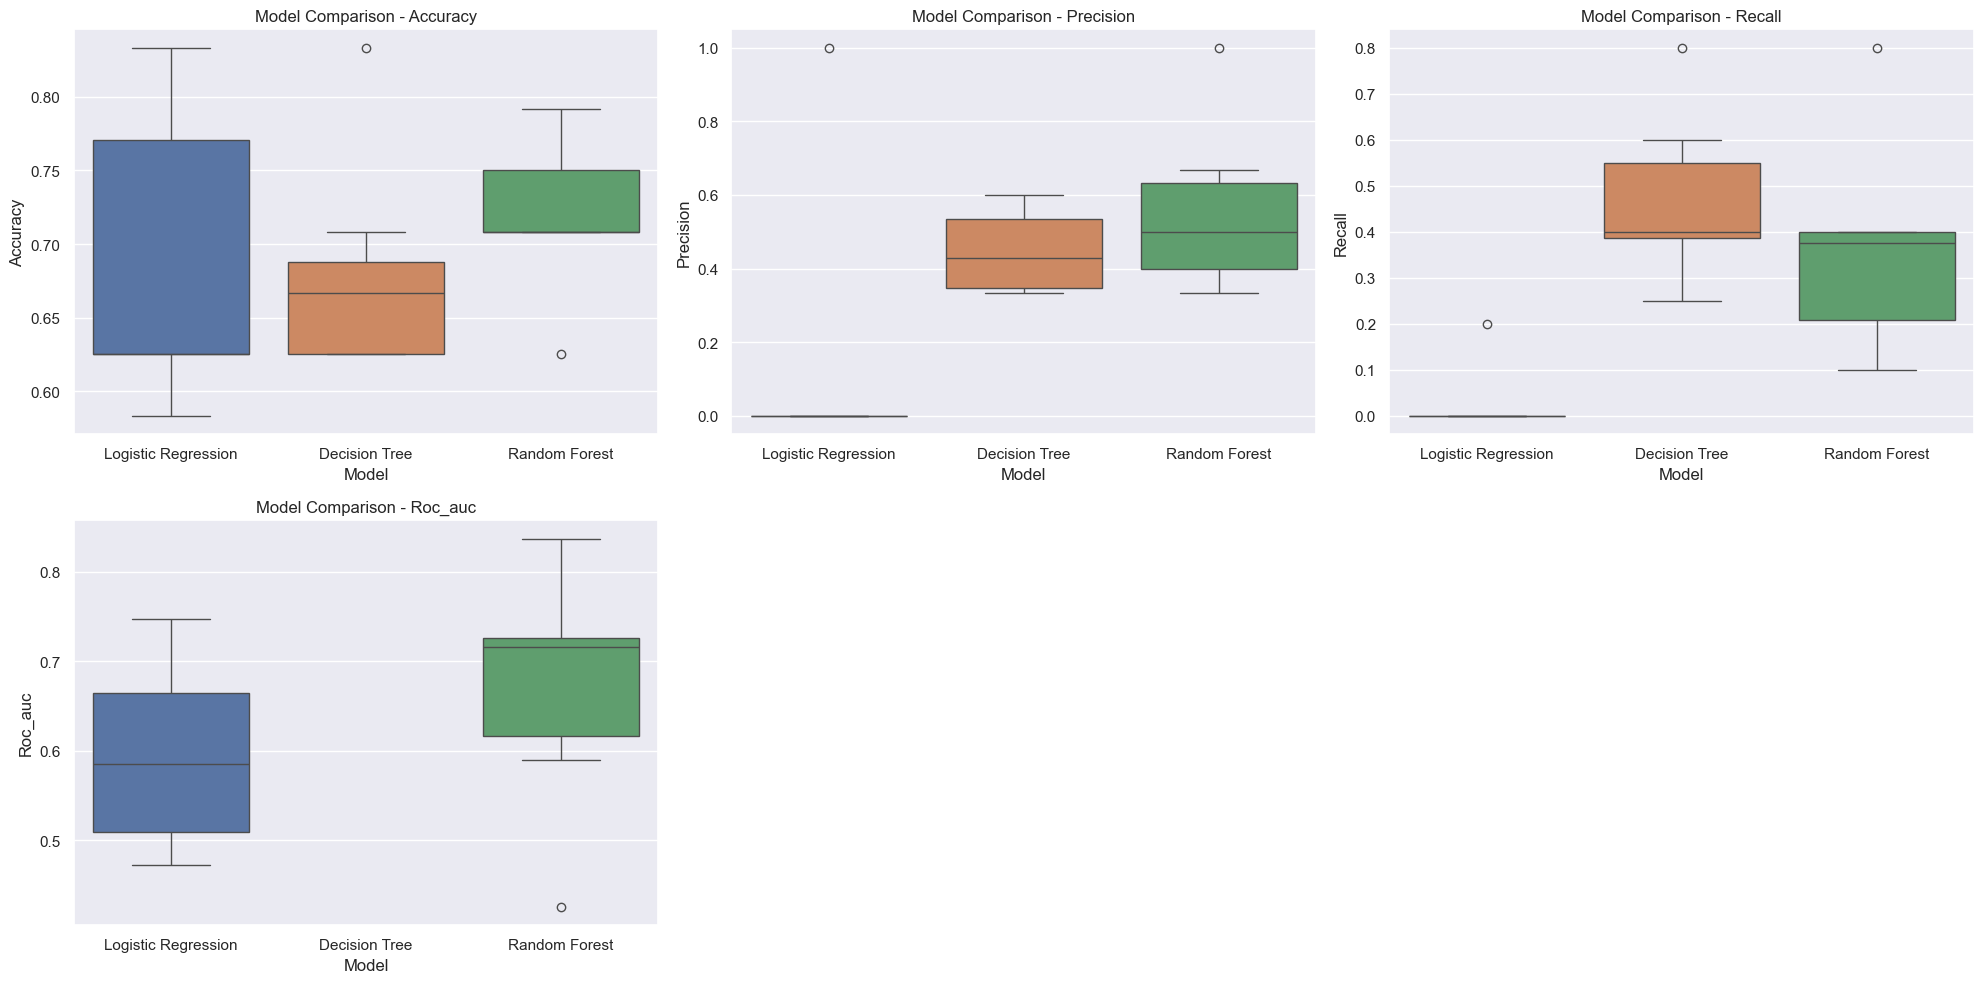

In [254]:

from sklearn.feature_selection import f_oneway

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestClassifier()
}

def evaluate_model(model, X, y, groups):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    mse_list = []
    
    for train_index, test_index in gkf.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            y_prob = None
            roc_auc = None
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        roc_auc_list.append(roc_auc)
        mse_list.append(mse)
    
    return {
        "accuracy": accuracy_list,
        "precision": precision_list,
        "recall": recall_list,
        "roc_auc": roc_auc_list,
    }

# Evaluate all models
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X, y, groups)
        
    
# Prepare data for plotting
metrics = ["accuracy", "precision", "recall", "roc_auc"]
plot_data = {}

for metric in metrics:
    plot_data[metric] = {
        model_name: results[model_name][metric]
        for model_name in models.keys()
    }

# Plotting
plt.figure(figsize=(20, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    metric_data = pd.DataFrame(plot_data[metric])
    sns.boxplot(data=metric_data)
    plt.title(f'Model Comparison - {metric.capitalize()}')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

